In [1]:
from utils import *
%matplotlib inline

In [2]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 7)

In [3]:
train_data, train_results, test_data, test_results = read_data()

In [4]:
from sklearn.neighbors import KNeighborsRegressor

def kneighbors_regressor(train_data, train_results, test_data, points_to_compare, features='all', prediction_mode='delta',
                         **est_parameters):
    est = KNeighborsRegressor(n_jobs=-1, **est_parameters)
    
    if features == 'all':
        make_model = to_model_with_features
    else:
        make_model = to_model
    
    if prediction_mode == 'delta':
        make_results = make_delta
        unmake_results = unmake_delta
    else:
        make_results = lambda train_data, train_results: train_results
        unmake_results = lambda test_data, prediction: prediction
    
    est.fit(make_model(train_data), to_model(make_results(train_data, train_results))) 
    prediction = unmake_results(test_data, from_model(est.predict(make_model(test_data))))
        
    return prediction[:points_to_compare]

In [6]:
from sklearn.ensemble import RandomForestRegressor

def random_forest_regressor(train_data, train_results, test_data, points_to_compare, features='all', prediction_mode='delta',
                            **est_parameters):
    est = RandomForestRegressor(n_jobs=-1, random_state=0, **est_parameters)
    
    if features == 'all':
        make_model = to_model_with_features
    else:
        make_model = to_model
    
    if prediction_mode == 'delta':
        make_results = make_delta
        unmake_results = unmake_delta
    else:
        make_results = lambda train_data, train_results: train_results
        unmake_results = lambda test_data, prediction: prediction
    
    est.fit(make_model(train_data), to_model(make_results(train_data, train_results))) 
    prediction = unmake_results(test_data, from_model(est.predict(make_model(test_data))))
        
    return prediction[:points_to_compare]

1/3: 2017-02-07 22:31:05
2/3: 2017-02-07 22:33:39
3/3: 2017-02-07 22:36:48
done! 2017-02-07 22:40:43
Results: [0.23663576810256448, 0.27054227670397701, 0.25625271309737541]


[0.23663576810256448, 0.27054227670397701, 0.25625271309737541]

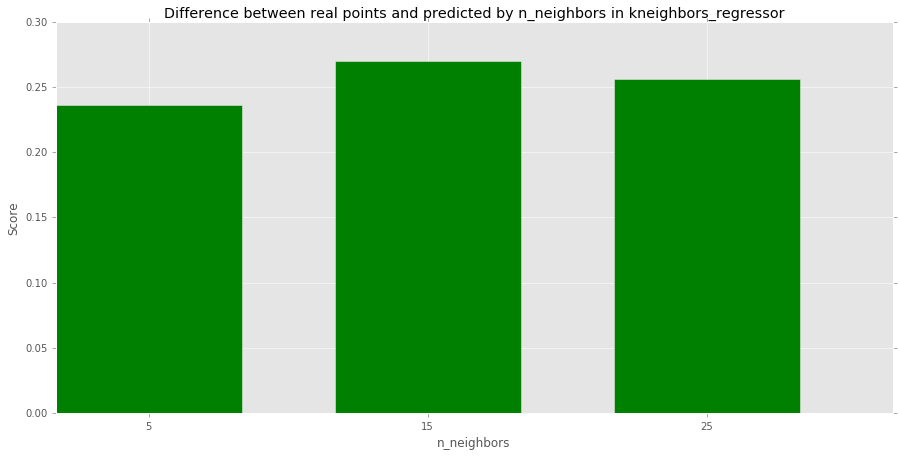

In [8]:
compare_results(function=kneighbors_regressor, test_results=test_results, parameter_name='n_neighbors',
                list_of_values=range(5, 30, 10), train_data=train_data, train_results=train_results,
                test_data=test_data, points_to_compare=5, features='all', prediction_mode='delta')

1/3: 2017-02-07 22:40:45
2/3: 2017-02-07 22:43:16
3/3: 2017-02-07 22:46:26
done! 2017-02-07 22:50:01
Results: [0.053638457301131259, 0.10239877948817755, 0.09162069256294092]


[0.053638457301131259, 0.10239877948817755, 0.09162069256294092]

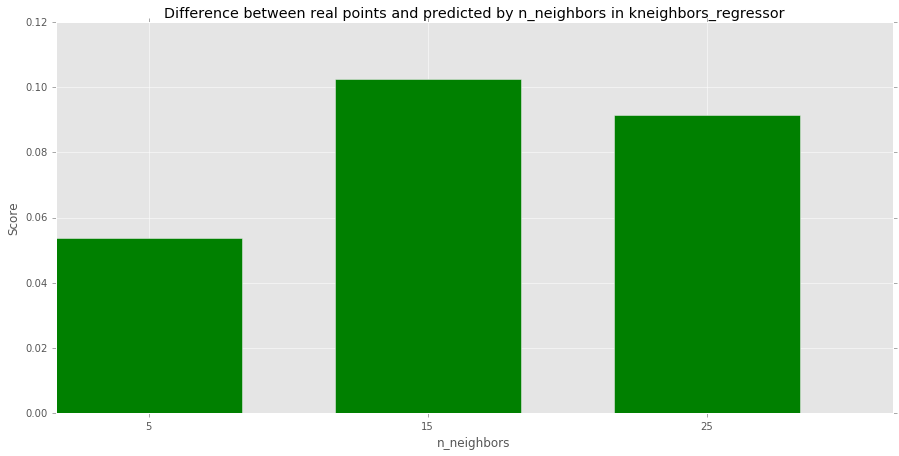

In [9]:
compare_results(function=kneighbors_regressor, test_results=test_results, parameter_name='n_neighbors',
                list_of_values=range(5, 30, 10), train_data=train_data, train_results=train_results,
                test_data=test_data, points_to_compare=1, features='all', prediction_mode='delta')

1/3: 2017-02-07 22:50:02
2/3: 2017-02-07 22:54:44
3/3: 2017-02-07 23:01:32
done! 2017-02-07 23:11:14
Results: [0.38189337898699993, 0.39214218703322845, 0.39654203541518229]


[0.38189337898699993, 0.39214218703322845, 0.39654203541518229]

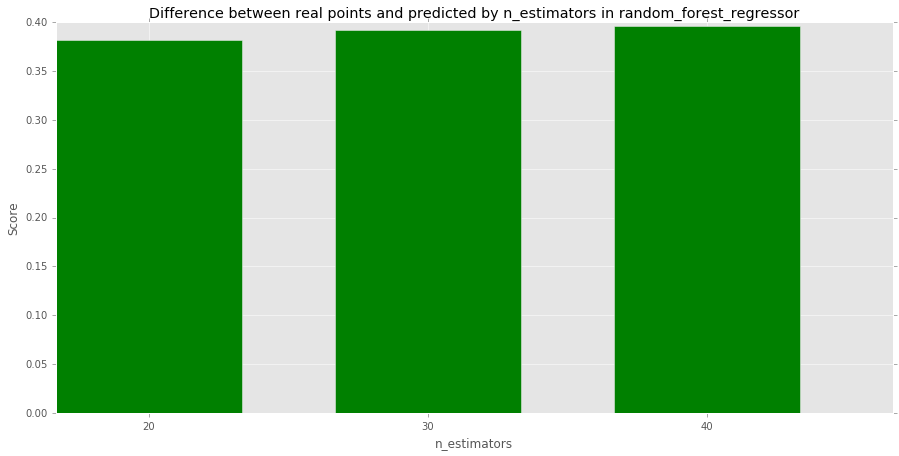

In [10]:
compare_results(function=random_forest_regressor, test_results=test_results, parameter_name='n_estimators',
                list_of_values=range(20, 50, 10), train_data=train_data, train_results=train_results,
                test_data=test_data, points_to_compare=5, features='all', prediction_mode='delta')

1/3: 2017-02-07 23:11:15
2/3: 2017-02-07 23:16:27
3/3: 2017-02-07 23:24:32
done! 2017-02-07 23:35:22
Results: [0.24604792714843837, 0.25923086088576719, 0.26547590531602583]


[0.24604792714843837, 0.25923086088576719, 0.26547590531602583]

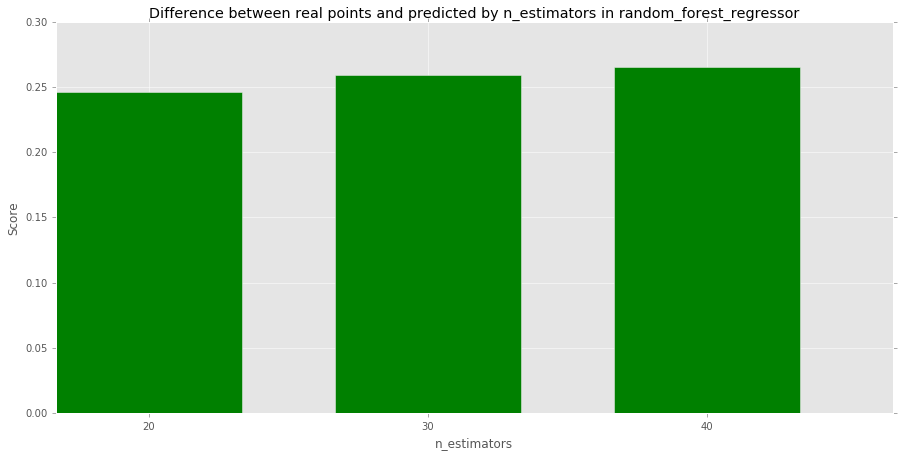

In [11]:
compare_results(function=random_forest_regressor, test_results=test_results, parameter_name='n_estimators',
                list_of_values=range(20, 50, 10), train_data=train_data, train_results=train_results,
                test_data=test_data, points_to_compare=1, features='all', prediction_mode='delta')